# **EDA Notebook**



---
## 0. Setup Environment

### 0.b Disable Warnings Messages

> Do not modify this code before running it

In [1]:
# Do not modify this code
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### 0.c Install Additional Packages

> If you are using additional packages, you need to install them here using the command: `! pip install <package_name>`

### 0.d Import Packages

In [2]:

import pandas as pd
import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import re

---
## B. Data Understanding

In [3]:
from IPython.display import display, HTML

def print_tile(size="h3", key=None, value=None):
    """
    Display a styled HTML tile in a Jupyter notebook.
    Args:
        size (str): HTML heading size (e.g., 'h1', 'h2', 'h3').
        key (str): Optional label for the tile.
        value (str): The value or content to display.
    """
    if key is not None:
        html = f"<div style='margin:10px 0;'><{size} style='display:inline; color:#2a4d69; margin-right:10px;'>{key}:</{size}><span style='font-size:1.2em; color:#4b86b4;'>{value}</span></div>"
    else:
        html = f"<div style='margin:10px 0;'><{size} style='color:#2a4d69;'>{value}</{size}></div>"
    display(HTML(html))

### B.1   Load Dataset

In [4]:
# Do not modify this code
try:
  df = pd.read_csv("../data/raw/customer_address.csv")
except Exception as e:
  print(e)

### B.2 Explore Dataset

> You can add more cells in this section

In [5]:
df.columns

Index(['Unnamed: 0', 'customer_id', 'street', 'type', 'suburb', 'postcode',
       'full_address'],
      dtype='object')

Popping the Unnamed: 0 column because it is an index column

In [6]:
df.pop('Unnamed: 0')

0            0
1            1
2            2
3            3
4            4
         ...  
11360    11360
11361    11361
11362    11362
11363    11363
11364    11364
Name: Unnamed: 0, Length: 11365, dtype: int64

In [7]:
df.head()

,customer_id,street,type,suburb,postcode,full_address
0,d36b3782-86b2-4f7e-97f4-19751cf735b1,Chandler Gardens,Park,Smithchester,6683.0,"Suite 159 4 Chandler Gardens Park, Smithcheste..."
1,c16a23a6-c001-4846-b16a-e681692d861b,Tara Alleyway,Avenue,Mayberg,2629.0,"Flat 31 247 Tara Alleyway Avenue, Mayberg QLD..."
2,f044a91f-3eeb-4342-9c96-2be28927a8a9,Sullivan Reserve,Reach,Vegamouth,2790.0,"Level 5 591 Sullivan Reserve Reach, Vegamouth ..."
3,36096d1a-4f30-4c1c-8453-3db3ea81692c,Daniel Parade,Break,East Matthewfurt,NaN,"Unit 09 7 Daniel Parade Break, East Matthewfur..."
4,7484593e-4ff2-44d6-9de6-7e3bd9fe8b19,Charles Driveway,River,New Shannon,2611.0,"720/460 Charles Driveway River, New Shannon W..."


In [8]:
df.describe()

,postcode
count,7530.000000
mean,3170.034130
std,1810.136976
min,200.000000
25%,2600.000000
50%,2693.000000
75%,2969.000000
max,9992.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11365 entries, 0 to 11364
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   customer_id   11365 non-null  object 
 1   street        11365 non-null  object 
 2   type          11365 non-null  object 
 3   suburb        9904 non-null   object 
 4   postcode      7530 non-null   float64
 5   full_address  8690 non-null   object 
dtypes: float64(1), object(5)
memory usage: 532.9+ KB


We can see we have some columns with the missing values.

In [10]:
df.nunique()

customer_id     7845
street          7189
type             200
suburb          5667
postcode        2018
full_address    6136
dtype: int64

In [11]:


df_duplicates = df[df.duplicated(subset=['customer_id'], keep=False)]

# Display duplicate rows
df_duplicates.head()# Sorting duplicate rows by 'customer_id' as an object (string)
df_duplicates_sorted = df_duplicates.sort_values(by='customer_id', key=lambda x: x.astype(str))

# Display the sorted duplicate rows
df_duplicates_sorted.head()


,customer_id,street,type,suburb,postcode,full_address
1747,001d7af4-9227-4d52-89e6-b89b04f55224,Graham Arcade,Dell,NaN,2612.0,"960/71 Graham Arcade Dell, St. Shannonchester ..."
7712,001d7af4-9227-4d52-89e6-b89b04f55224,Graham Arcade,Dell,NaN,2612.0,"960/71 Graham Arcade Dell, St. Shannonchester ..."
5070,00256988-b4d0-45f3-9351-be803389701e,Price Nook,Tor,South Xavierton,NaN,"Level 9 241 Price Nook Tor, South Xavierton Q..."
4483,00256988-b4d0-45f3-9351-be803389701e,Price Nook,Tor,South Xavierton,NaN,"Level 9 241 Price Nook Tor, South Xavierton Q..."
4369,0041651a-8a49-4df1-8c6c-23eeaf673a4b,Amy Centre,Broadway,Dannyfurt,9968.0,"6/7 Amy Centre Broadway, Dannyfurt WA, 9968"


The data seems to have duplicate values.

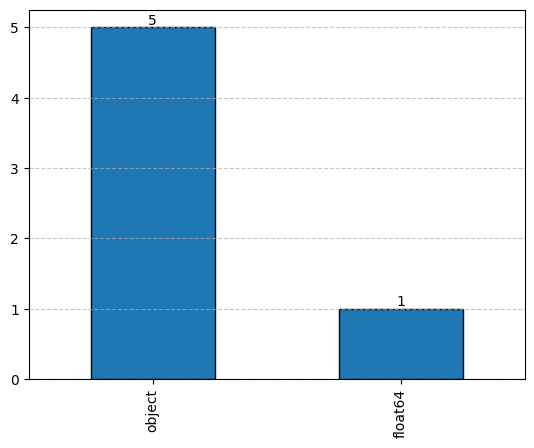

In [12]:
# visualizing the data types count
ax=df.dtypes.value_counts().plot(kind='bar',edgecolor='black')
for container in ax.containers:
    ax.bar_label(container, fmt='%d')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [13]:
numerical_columns = df.select_dtypes(include=['number']).columns
numerical_columns

Index(['postcode'], dtype='object')

Since "Unnamed: 0" column is a serial number colunm and does not add value to the model so we are removing it from the the numerical columns

In [14]:

numerical_features=df[numerical_columns]
numerical_features.head()


,postcode
0,6683.0
1,2629.0
2,2790.0
3,NaN
4,2611.0


Now Lets us check for missing values

In [15]:
numerical_features.isnull().sum()

postcode    3835
dtype: int64

we will deal with missing values later


# Now lets look at the categorical features

In [16]:
categorical_columns = df.select_dtypes(include=['object','bool']).columns
categorical_columns

Index(['customer_id', 'street', 'type', 'suburb', 'full_address'], dtype='object')

In [17]:
categorical_features=df[categorical_columns]
categorical_features.head()

,customer_id,street,type,suburb,full_address
0,d36b3782-86b2-4f7e-97f4-19751cf735b1,Chandler Gardens,Park,Smithchester,"Suite 159 4 Chandler Gardens Park, Smithcheste..."
1,c16a23a6-c001-4846-b16a-e681692d861b,Tara Alleyway,Avenue,Mayberg,"Flat 31 247 Tara Alleyway Avenue, Mayberg QLD..."
2,f044a91f-3eeb-4342-9c96-2be28927a8a9,Sullivan Reserve,Reach,Vegamouth,"Level 5 591 Sullivan Reserve Reach, Vegamouth ..."
3,36096d1a-4f30-4c1c-8453-3db3ea81692c,Daniel Parade,Break,East Matthewfurt,"Unit 09 7 Daniel Parade Break, East Matthewfur..."
4,7484593e-4ff2-44d6-9de6-7e3bd9fe8b19,Charles Driveway,River,New Shannon,"720/460 Charles Driveway River, New Shannon W..."


lets check for missing values

In [18]:
categorical_features.nunique()

customer_id     7845
street          7189
type             200
suburb          5667
full_address    6136
dtype: int64

In [19]:
categorical_features.isnull().sum()

customer_id        0
street             0
type               0
suburb          1461
full_address    2675
dtype: int64

we will deal with this later

> Add blockquote



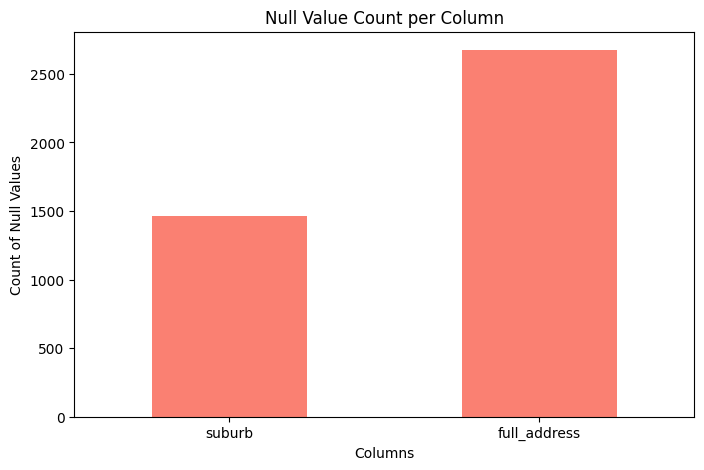

Data types of columns with null values:
suburb          object
full_address    object
dtype: object


In [20]:
# Selecting columns with null values
null_counts = categorical_features.isnull().sum()
null_counts = null_counts[null_counts > 0]  # Keep only columns with null values

# Plotting the bar chart
plt.figure(figsize=(8, 5))
null_counts.plot(kind='bar', color='salmon')
plt.xlabel('Columns')
plt.ylabel('Count of Null Values')
plt.title('Null Value Count per Column')
plt.xticks(rotation=0)

plt.show()


# Displaying data types of columns with null values
print("Data types of columns with null values:")
print(df[null_counts.index].dtypes)

In [21]:
categorical_features.suburb.nunique()

5667

we will deal with these later

In [22]:

dataset_insights = """



Identified the index column and removed the unnecessary Unnamed: 0 column to clean the dataset structure.

####Duplicate Values Detected

Checked for duplicates and found repeated values, which will be addressed in the cleaning phase.

####Missing Values Analysis

Examined all columns for missing values and discovered that suburb, full address, postcode column contains missing entries which will be addressed in the cleaning phase."""



In [23]:
# Do not modify this code
print_tile(size="h3", key='dataset_insights', value=dataset_insights)

### B.3 Explore Feature of Interest 1

> full_address'

Customer’s full address

In [24]:
df.head()

,customer_id,street,type,suburb,postcode,full_address
0,d36b3782-86b2-4f7e-97f4-19751cf735b1,Chandler Gardens,Park,Smithchester,6683.0,"Suite 159 4 Chandler Gardens Park, Smithcheste..."
1,c16a23a6-c001-4846-b16a-e681692d861b,Tara Alleyway,Avenue,Mayberg,2629.0,"Flat 31 247 Tara Alleyway Avenue, Mayberg QLD..."
2,f044a91f-3eeb-4342-9c96-2be28927a8a9,Sullivan Reserve,Reach,Vegamouth,2790.0,"Level 5 591 Sullivan Reserve Reach, Vegamouth ..."
3,36096d1a-4f30-4c1c-8453-3db3ea81692c,Daniel Parade,Break,East Matthewfurt,NaN,"Unit 09 7 Daniel Parade Break, East Matthewfur..."
4,7484593e-4ff2-44d6-9de6-7e3bd9fe8b19,Charles Driveway,River,New Shannon,2611.0,"720/460 Charles Driveway River, New Shannon W..."


Seems like we can extract most of the other columns from the full_address column

In [25]:
df.full_address.isnull().sum()

np.int64(2675)

Lets analyse and see the missing values for full_address

In [26]:
missing_address_df=df[df.full_address.isnull()]
missing_address_df.isnull().sum()

customer_id        0
street             0
type               0
suburb           411
postcode        1156
full_address    2675
dtype: int64

Now lets addrss then missing values for suburb column
- try to fill the suburb misssing values from the full_address column

Lets first see the columns with missing full_address and suburb values

In [27]:
missing_address_df[missing_address_df.suburb.isnull()]

,customer_id,street,type,suburb,postcode,full_address
109,6d99d4e6-0c83-447e-95c7-53840163d1a7,Owens Anchorage,Beach,NaN,NaN,NaN
110,5f6bdce0-f672-4a5c-bc2b-4ff62cda9137,Lee Byway,Arcade,NaN,2994.0,NaN
138,f0a0d3fa-f758-4fb9-8d11-8defe11689c5,Green Plaza,Ride,NaN,2920.0,NaN
209,46a78d3a-943d-4ff2-ba0a-d0eb48cd1d42,Marcus Motorway,Run,NaN,NaN,NaN
268,13f37df4-6546-419b-95dd-729b19093431,Kimberly Formation,Circuit,NaN,NaN,NaN
...,...,...,...,...,...,...
11277,1bdbe4af-fa3e-4460-a175-f170757c6f4c,Jacobs Circuit,Close,NaN,NaN,NaN
11281,f0ffd9a8-ac1d-4e63-ba99-807e7f02fb3d,Rachel Block,Square,NaN,2603.0,NaN
11284,6d99d4e6-0c83-447e-95c7-53840163d1a7,Owens Anchorage,Beach,NaN,NaN,NaN
11327,9b080584-6203-4071-8113-acb140377ac0,Terry Plaza,Concourse,NaN,NaN,NaN


Lets see if each postcode uniquely corresponds to a single suburb

In [28]:
# Group by 'postcode' and count unique 'suburb' values
postcode_suburb_counts = df.groupby('postcode')['suburb'].nunique()

# Find postcodes that map to more than one suburb
non_unique_postcodes = postcode_suburb_counts[postcode_suburb_counts > 1]

# Display the result
if non_unique_postcodes.empty:
    print("Each postcode uniquely corresponds to a single suburb.")
else:
    print("The following postcodes correspond to multiple suburbs:")
    print(non_unique_postcodes)


The following postcodes correspond to multiple suburbs:
postcode
202.0     4
204.0     2
205.0     2
209.0     2
213.0     3
         ..
9240.0    2
9264.0    3
9489.0    2
9659.0    2
9853.0    2
Name: suburb, Length: 645, dtype: int64


does not seems like it so lets try using mulitple columns to identify the suburb column

now lets check whether a combination of postcode and street can uniquely identify suburb

In [29]:
# Group by 'postcode' and 'street' and count unique 'suburb' values
postcode_street_suburb_counts = df.groupby(['postcode', 'street'])['suburb'].nunique()

# Find entries where the combination is not unique
non_unique_postcode_street = postcode_street_suburb_counts[postcode_street_suburb_counts > 1]

# Display the result
if non_unique_postcode_street.empty:
    print("Each postcode and street combination uniquely corresponds to a single suburb.")
else:
    print("The following postcode and street combinations correspond to multiple suburbs:")
    print(non_unique_postcode_street)


Each postcode and street combination uniquely corresponds to a single suburb.


it did

Now lets see whether suburb and street together uniquely determine postcode

In [30]:
# Group by 'suburb' and 'street' and count unique 'postcode' values
suburb_street_postcode_counts = df.groupby(['suburb', 'street'])['postcode'].nunique()

# Identify entries where the combination is not unique
non_unique_suburb_street = suburb_street_postcode_counts[suburb_street_postcode_counts > 1]

# Display the results
if non_unique_suburb_street.empty:
    print("Each suburb and street combination uniquely corresponds to a single postcode.")
else:
    print("The following suburb and street combinations correspond to multiple postcodes:")
    print(non_unique_suburb_street)


Each suburb and street combination uniquely corresponds to a single postcode.


It does so we can use this to remove the missing values from the dataset.

In [31]:

feature1_insights = """

#### Identified Missing Values

Discovered approximately 2,600 null values in the dataset.

Addressing these missing values is crucial to maintaining data integrity.

#### Explored Alternative Filling Methods for Suburb

Investigated whether missing suburb values could be filled using other available columns.

Found that each postcode and street combination uniquely corresponds to a distinct suburb.

This allowed for an accurate method to impute missing suburb entries.

#### Validated Imputation for Postcode Using Suburb & Street

Similarly, examined whether a combination of suburb and street could accurately fill in missing postcode values.

Confirmed that each suburb-street pair uniquely maps to a postcode, making it a reliable approach for imputation.

"""

In [32]:
# Do not modify this code
print_tile(size="h3", key='feature1_insights', value=feature1_insights)

### B.4 Explore Feature of Interest 2

> You can add more cells in this section

In [33]:
df.suburb.head()

0        Smithchester
1             Mayberg
2           Vegamouth
3    East Matthewfurt
4         New Shannon
Name: suburb, dtype: object

In [34]:
df.suburb.nunique()

5667

In [35]:
df.suburb.describe(include=['object'])

count             9904
unique            5667
top       Johnsonmouth
freq                15
Name: suburb, dtype: object

In [36]:
df.suburb.isnull().sum()

np.int64(1461)

Checking if the missign suburb has full address values to fill the missing values

In [37]:
# Filter rows where 'suburb' is missing
missing_suburb_df = df[df['suburb'].isnull()]

# Display the 'full_address' column for these rows
missing_suburb_df[['customer_id','full_address']]


,customer_id,full_address
27,c55d5d08-678f-422a-8d11-41a5d4095433,"Flat 53 5 Spencer Riverway Freeway, Lewisport ..."
30,a5015049-d55a-4df0-8902-b20d40bc7ae0,"040/45 Rodney Right Of Way Flat, Jefferymouth ..."
33,ed157c5c-8d24-4392-9b07-5608a2f1480e,"Suite 068 62 Harrison Siding Mews, North Paulv..."
38,fb60ec77-b356-4e27-982e-6ca7c61063f3,"Apt. 365 37 Chambers Lower Service Way, Brownt..."
44,c3fe806e-1024-477e-82fd-e0b73459edf1,"Flat 83 8 Jason Walkway Lane, New William SA,..."
...,...,...
11331,947a68f5-a50f-4666-8094-118ab0bde76d,"Unit 11 0 Ana Rue Crest, Michellebury NSW, 2976"
11338,734fc657-90c7-448c-b0d2-c77d0cef7bcd,NaN
11339,bb44a5d0-b580-4719-a5e9-991da93be1fa,"722/7 Tommy Dell Fire Track, Cannonchester NT..."
11353,74727321-5874-41d1-91db-ebae043b0c05,"931/75 Randy Drive Access, Meganland QLD, 2934"


we can extract the subrub column from the address using string manipulation we will do this later .
Similarly we can extract multiple missing values in the different columns from the address column

In [38]:

feature_2_insights = """

#### High Number of Unique Suburbs

The dataset contains approximately 5,600 unique suburb names, showcasing diverse geographic coverage.

### Most Common Suburb: Johnsonmouth

Johnsonmouth appears 15 times, making it the most frequently occurring suburb in the dataset.

This could indicate a higher concentration of customers in this area.

### Missing Values Exist

Around 1,400 missing values were identified in the suburb column, requiring careful handling for completeness.

### Potential for Imputation

Some missing suburb values can be extracted from the full_address column, offering a reliable method for filling gaps.

"""

In [39]:
# Do not modify this code
print_tile(size="h3", key='feature_2_insights', value=feature_2_insights)

---
## C. Data Cleaning

### C.1 Copy Dataset

In [40]:
# Do not modify this code
df_clean = df.copy()
try:
  df_clean = df.copy()
except Exception as e:
  print(e)

In [41]:
#delme
df_clean.dtypes

customer_id      object
street           object
type             object
suburb           object
postcode        float64
full_address     object
dtype: object

### C.2 Fixing "Removing the Duplicates"

* duplicate values lead to inaccurate conclusions
* they introduce bias and reduce the accuracy of the model
* they increase the size of the dataset slowing down the processing and model training

In [42]:


df_clean_duplicates = df_clean[df_clean.duplicated(subset=['customer_id'], keep=False)]


# Display duplicate rows
df_clean_duplicates.head()# Sorting duplicate rows by 'customer_id' as an object (string)
df_clean_duplicates_sorted = df_clean_duplicates.sort_values(by='customer_id', key=lambda x: x.astype(str))

# Display the sorted duplicate rows
df_clean_duplicates_sorted.head()


,customer_id,street,type,suburb,postcode,full_address
1747,001d7af4-9227-4d52-89e6-b89b04f55224,Graham Arcade,Dell,NaN,2612.0,"960/71 Graham Arcade Dell, St. Shannonchester ..."
7712,001d7af4-9227-4d52-89e6-b89b04f55224,Graham Arcade,Dell,NaN,2612.0,"960/71 Graham Arcade Dell, St. Shannonchester ..."
5070,00256988-b4d0-45f3-9351-be803389701e,Price Nook,Tor,South Xavierton,NaN,"Level 9 241 Price Nook Tor, South Xavierton Q..."
4483,00256988-b4d0-45f3-9351-be803389701e,Price Nook,Tor,South Xavierton,NaN,"Level 9 241 Price Nook Tor, South Xavierton Q..."
4369,0041651a-8a49-4df1-8c6c-23eeaf673a4b,Amy Centre,Broadway,Dannyfurt,9968.0,"6/7 Amy Centre Broadway, Dannyfurt WA, 9968"


In [43]:
#delme
df_clean.dtypes

customer_id      object
street           object
type             object
suburb           object
postcode        float64
full_address     object
dtype: object

In [44]:
prev=df_clean.shape[0]
prev

11365

In [45]:
df_clean = df_clean.drop_duplicates(keep='first', ignore_index=True)


In [46]:
current=df_clean.shape[0]
current


7845

number duplicate values removed

In [47]:
prev-current

3520

In [48]:


df_clean_duplicates = df_clean[df_clean.duplicated(subset=['customer_id'], keep=False)]


# Display duplicate rows
df_clean_duplicates.head()# Sorting duplicate rows by 'customer_id' as an object (string)
df_clean_duplicates_sorted = df_clean_duplicates.sort_values(by='customer_id', key=lambda x: x.astype(str))

# Display the sorted duplicate rows
df_clean_duplicates_sorted.head()


,customer_id,street,type,suburb,postcode,full_address


In [49]:

data_cleaning_1_explanations = """


Identified and removed approximately 7,000 duplicate records based on customer_id, ensuring data integrity.

Kept only the first occurrence of each duplicate to maintain relevant customer information while eliminating redundancy.


"""

In [50]:
# Do not modify this code
print_tile(size="h3", key='data_cleaning_1_explanations', value=data_cleaning_1_explanations)

### C.3 Fixing "Dealing with the missing values"

> This approach enhances data completeness by filling missing values, ultimately improving data quality. It also ensures that the model training process is more reliable and effective, leading to better predictive performance.


In [51]:
df_clean.head()


,customer_id,street,type,suburb,postcode,full_address
0,d36b3782-86b2-4f7e-97f4-19751cf735b1,Chandler Gardens,Park,Smithchester,6683.0,"Suite 159 4 Chandler Gardens Park, Smithcheste..."
1,c16a23a6-c001-4846-b16a-e681692d861b,Tara Alleyway,Avenue,Mayberg,2629.0,"Flat 31 247 Tara Alleyway Avenue, Mayberg QLD..."
2,f044a91f-3eeb-4342-9c96-2be28927a8a9,Sullivan Reserve,Reach,Vegamouth,2790.0,"Level 5 591 Sullivan Reserve Reach, Vegamouth ..."
3,36096d1a-4f30-4c1c-8453-3db3ea81692c,Daniel Parade,Break,East Matthewfurt,NaN,"Unit 09 7 Daniel Parade Break, East Matthewfur..."
4,7484593e-4ff2-44d6-9de6-7e3bd9fe8b19,Charles Driveway,River,New Shannon,2611.0,"720/460 Charles Driveway River, New Shannon W..."


Extracting the suburb missing values from the full_address column


In [52]:
# Function to extract suburb from full_address
def extract_suburb(row):
    if pd.notnull(row['suburb']):  # If suburb is not missing, keep it
        return row['suburb']
    elif pd.notnull(row['full_address']):  # If suburb is missing, extract from full_address
        address_parts = row['full_address'].split(',')
        if len(address_parts) > 1:
            suburb_with_state = address_parts[-2].strip()  # Extract second-to-last part as suburb
            return re.sub(r'\s[A-Z]{2,3}$', '', suburb_with_state)  # Remove state abbreviation
    return None  # If no data available, return None

# Apply function to fill missing suburb values
df_clean['suburb'] = df_clean.apply(extract_suburb, axis=1)

# Display results
print(df_clean[['full_address', 'suburb']])


                                           full_address            suburb
0     Suite 159 4 Chandler Gardens Park, Smithcheste...      Smithchester
1     Flat 31 247 Tara Alleyway Avenue, Mayberg  QLD...           Mayberg
2     Level 5 591 Sullivan Reserve Reach, Vegamouth ...         Vegamouth
3     Unit 09 7 Daniel Parade Break, East Matthewfur...  East Matthewfurt
4     720/460 Charles Driveway River, New Shannon  W...       New Shannon
...                                                 ...               ...
7840  Level 0 6 Monica Triangle Grange, East Josephh...  East Josephhaven
7841  91/5 Peter Riviera Glen, New Keithmouth  WA,  ...    New Keithmouth
7842  Apt. 882 134 Powers Mount Path, Garciaton  QLD...         Garciaton
7843  Flat 44 13 Gomez Port Path, Adamsburgh  NT,  0935        Adamsburgh
7844                                                NaN        Tracimouth

[7845 rows x 2 columns]


Extracting post code from the addresss column

In [53]:
# Function to extract postcode using commas
def extract_postcode(row):
    if pd.notnull(row['postcode']):  # Correct check for a single value
        return row['postcode']
    elif isinstance(row['full_address'], str):  # Ensure full_address is a string
        address_parts = row['full_address'].split(',')  # Split the address by commas
        if len(address_parts) > 1:
            return address_parts[-1].strip()  # Extract last part (postcode)
    return None  # If no valid postcode found

# Apply function to fill missing postcode values
df_clean['postcode'] = df_clean.apply(extract_postcode, axis=1)

# Display the updated DataFrame
print(df_clean[['full_address', 'postcode']])


                                           full_address postcode
0     Suite 159 4 Chandler Gardens Park, Smithcheste...   6683.0
1     Flat 31 247 Tara Alleyway Avenue, Mayberg  QLD...   2629.0
2     Level 5 591 Sullivan Reserve Reach, Vegamouth ...   2790.0
3     Unit 09 7 Daniel Parade Break, East Matthewfur...     2839
4     720/460 Charles Driveway River, New Shannon  W...   2611.0
...                                                 ...      ...
7840  Level 0 6 Monica Triangle Grange, East Josephh...   5353.0
7841  91/5 Peter Riviera Glen, New Keithmouth  WA,  ...   2910.0
7842  Apt. 882 134 Powers Mount Path, Garciaton  QLD...   8214.0
7843  Flat 44 13 Gomez Port Path, Adamsburgh  NT,  0935     0935
7844                                                NaN    919.0

[7845 rows x 2 columns]


. Uniquely Determine Postcode Using Suburb and Street

In [54]:
# Create mapping for postcode using suburb and street
postcode_mapping = df_clean.groupby(['suburb', 'street'])['postcode'].first().reset_index()

# Fill only missing postcode values
df_clean.loc[df_clean['postcode'].isna(), 'postcode'] = df_clean.loc[df_clean['postcode'].isna()].merge(postcode_mapping, on=['suburb', 'street'], how='left')['postcode_y']

print("Missing postcode values successfully filled using suburb and street.")


Missing postcode values successfully filled using suburb and street.


Uniquely Determine Suburb Using Postcode and Street

In [55]:
# Create mapping for suburb using postcode and street
suburb_mapping = df_clean.groupby(['postcode', 'street'])['suburb'].first().reset_index()

# Fill only missing suburb values
df_clean.loc[df_clean['suburb'].isna(), 'suburb'] = df_clean.loc[df_clean['suburb'].isna()].merge(suburb_mapping, on=['postcode', 'street'], how='left')['suburb_y']

print("Missing suburb values successfully filled using postcode and street.")


Missing suburb values successfully filled using postcode and street.


In [56]:
df_clean.isnull().sum()

customer_id        0
street             0
type               0
suburb           178
postcode         525
full_address    1507
dtype: int64

In [57]:

data_cleaning_2_explanations = """

### Successful Extraction of Missing Suburb Values

Missing suburb entries were effectively retrieved from the full_address column, improving data completeness.

This approach ensures accurate mapping of customer locations, reducing potential errors in geographic analysis.

### Postcode Imputation Using Address Data

Missing postcode values were extracted from the full_address column, ensuring consistency and correctness in the dataset.

This step enhances data reliability for future location-based segmentation and customer analytics.

Uniquely Determine Suburb Using Postcode and Street

Uniquely Determine Postcode Using Suburb and Street


"""

In [58]:
# Do not modify this code
print_tile(size="h3", key='data_cleaning_2_explanations', value=data_cleaning_2_explanations)

### C.4 Fixing "Dealing with the left over missing values"

> since we cannot find any relevant data from the missing value fo the full address column so we will deal with them right now

In [59]:
missing_address_df_clean=df_clean[df_clean.full_address.isnull()]
missing_address_df_clean.isnull().sum()

customer_id        0
street             0
type               0
suburb           178
postcode         525
full_address    1507
dtype: int64

Since 1507 data points have no address so we cannot extract the values for other columns. such data points represent around 13 percent of the data points so we can drop them so that our train well

In [60]:
# Drop rows where 'full_address' is missing
df_clean_filtered = df_clean.dropna(subset=['full_address'])



In [61]:
missing_address_df_clean=df_clean[df_clean.full_address.isnull()]
missing_address_df_clean.isnull().sum()

customer_id        0
street             0
type               0
suburb           178
postcode         525
full_address    1507
dtype: int64

In [62]:

data_cleaning_3_explanations = """
since we were not able to find any relevant data from the missing value fo the full address column so we will deal with them right now

Since 1507 data points have no address so we cannot extract the values for other columns. such data points represent around 13 percent of the data points so we can drop them

"""

In [63]:
# Do not modify this code
print_tile(size="h3", key='data_cleaning_3_explanations', value=data_cleaning_3_explanations)

---
## D. Feature Engineering

### D.1 Copy Datasets

In [64]:
# Do not modify this code
try:
  df_eng = df_clean.copy()
except Exception as e:
  print(e)

### D.2 New Feature "Postcode_binning"

Raw postcodes have high cardinality, making them difficult for predictive models to process effectively.

Binning reduces the number of unique values, improving model efficiency and interpretability.

Allows businesses to compare customer behaviors based on postcode bins (e.g., urban vs. suburban vs. rural trends).

In [65]:

df_eng.head()

,customer_id,street,type,suburb,postcode,full_address
0,d36b3782-86b2-4f7e-97f4-19751cf735b1,Chandler Gardens,Park,Smithchester,6683.0,"Suite 159 4 Chandler Gardens Park, Smithcheste..."
1,c16a23a6-c001-4846-b16a-e681692d861b,Tara Alleyway,Avenue,Mayberg,2629.0,"Flat 31 247 Tara Alleyway Avenue, Mayberg QLD..."
2,f044a91f-3eeb-4342-9c96-2be28927a8a9,Sullivan Reserve,Reach,Vegamouth,2790.0,"Level 5 591 Sullivan Reserve Reach, Vegamouth ..."
3,36096d1a-4f30-4c1c-8453-3db3ea81692c,Daniel Parade,Break,East Matthewfurt,2839,"Unit 09 7 Daniel Parade Break, East Matthewfur..."
4,7484593e-4ff2-44d6-9de6-7e3bd9fe8b19,Charles Driveway,River,New Shannon,2611.0,"720/460 Charles Driveway River, New Shannon W..."


In [66]:
df_eng.postcode.describe()

count     7320.0
unique    2851.0
top       2619.0
freq       162.0
Name: postcode, dtype: float64

In [67]:

# Function to safely convert postcodes  while handling NoneType and NaN values
def safe_convert(value):
    try:
        if pd.notna(value):  # Check if value is not NaN
            return int(value)  # Convert valid number to integer
        else:
            return np.nan  # Preserve NaN values
    except (ValueError, TypeError):
        print(f"Cannot convert: {value}")  # Print problematic values
        return np.nan  # Keep NaN values intact

# Apply the function to the postcode column
df_eng['postcode'] = df_eng['postcode'].apply(safe_convert)

# Display the updated DataFrame and data types
print(df_eng.dtypes)


customer_id      object
street           object
type             object
suburb           object
postcode        float64
full_address     object
dtype: object


In [68]:
# Convert postcode column to integer while preserving NaN values
df_eng['postcode'] = df_eng['postcode'].astype("Int64")
# Determine range of postcodes
min_postcode = df_eng['postcode'].min()
max_postcode = df_eng['postcode'].max()

# Define number of bins (adjust based on data distribution)
num_bins = 10  # Example: Dividing postcodes into 10 groups

# Compute bin edges automatically
postcode_bins = pd.cut(df_eng['postcode'], bins=num_bins, labels=False)  # Numeric bin labels

# Add binning column to DataFrame
df_eng['postcode_bin'] = postcode_bins

# Display results
print(df_eng[['postcode', 'postcode_bin']].head())


   postcode  postcode_bin
0      6683           6.0
1      2629           2.0
2      2790           2.0
3      2839           2.0
4      2611           2.0


In [69]:
df_eng.head()

,customer_id,street,type,suburb,postcode,full_address,postcode_bin
0,d36b3782-86b2-4f7e-97f4-19751cf735b1,Chandler Gardens,Park,Smithchester,6683,"Suite 159 4 Chandler Gardens Park, Smithcheste...",6.0
1,c16a23a6-c001-4846-b16a-e681692d861b,Tara Alleyway,Avenue,Mayberg,2629,"Flat 31 247 Tara Alleyway Avenue, Mayberg QLD...",2.0
2,f044a91f-3eeb-4342-9c96-2be28927a8a9,Sullivan Reserve,Reach,Vegamouth,2790,"Level 5 591 Sullivan Reserve Reach, Vegamouth ...",2.0
3,36096d1a-4f30-4c1c-8453-3db3ea81692c,Daniel Parade,Break,East Matthewfurt,2839,"Unit 09 7 Daniel Parade Break, East Matthewfur...",2.0
4,7484593e-4ff2-44d6-9de6-7e3bd9fe8b19,Charles Driveway,River,New Shannon,2611,"720/460 Charles Driveway River, New Shannon W...",2.0


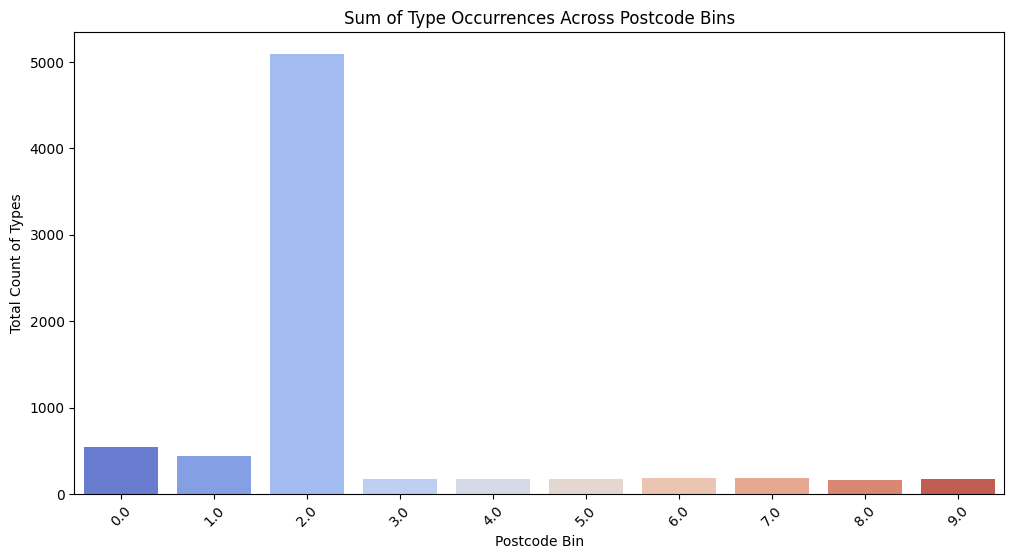

In [70]:


# Aggregate data: sum of type occurrences per postcode_bin
postcode_type_sum = df_eng.groupby('postcode_bin')['type'].count().reset_index()

# Rename columns for clarity
postcode_type_sum.columns = ['postcode_bin', 'total_type_count']

# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='postcode_bin', y='total_type_count', data=postcode_type_sum, palette='coolwarm')

plt.xlabel("Postcode Bin")
plt.ylabel("Total Count of Types")
plt.title("Sum of Type Occurrences Across Postcode Bins")
plt.xticks(rotation=45)
plt.show()


In [71]:
df_eng.head()

,customer_id,street,type,suburb,postcode,full_address,postcode_bin
0,d36b3782-86b2-4f7e-97f4-19751cf735b1,Chandler Gardens,Park,Smithchester,6683,"Suite 159 4 Chandler Gardens Park, Smithcheste...",6.0
1,c16a23a6-c001-4846-b16a-e681692d861b,Tara Alleyway,Avenue,Mayberg,2629,"Flat 31 247 Tara Alleyway Avenue, Mayberg QLD...",2.0
2,f044a91f-3eeb-4342-9c96-2be28927a8a9,Sullivan Reserve,Reach,Vegamouth,2790,"Level 5 591 Sullivan Reserve Reach, Vegamouth ...",2.0
3,36096d1a-4f30-4c1c-8453-3db3ea81692c,Daniel Parade,Break,East Matthewfurt,2839,"Unit 09 7 Daniel Parade Break, East Matthewfur...",2.0
4,7484593e-4ff2-44d6-9de6-7e3bd9fe8b19,Charles Driveway,River,New Shannon,2611,"720/460 Charles Driveway River, New Shannon W...",2.0


In [72]:

feature_engineering_1_explanations = """

Postcode Bin 2.0 overwhelmingly dominates the distribution with a total count of types exceeding 5000.
The spike in bin 2.0 indicate a key area of interest, such as a population or activity hub.
Raw postcodes have high cardinality, making them difficult for predictive models to process effectively.

Binning reduces the number of unique values, improving model efficiency and interpretability.

Allows businesses to compare customer behaviors based on postcode bins (e.g., urban vs. suburban vs. rural trends).
"""

In [73]:
# Do not modify this code
print_tile(size="h3", key='feature_engineering_1_explanations', value=feature_engineering_1_explanations)

### D.3 New Feature "State"

> State-level analysis can assist in predicting demand trends based on location.
> Customers from different states may exhibit distinct purchasing behaviors due to regional preferences, economic conditions, or demographics.


In [74]:


# Function to extract the state abbreviation from full_address
def extract_state(address):
    try:
        return address.split(',')[-2].split()[-1]  # Extracts the last word before postcode
    except (IndexError, AttributeError):
        return None  # Handle missing or improperly formatted addresses

# Apply function to create a new state column
df_eng['state'] = df_eng['full_address'].apply(extract_state)

# Display the updated DataFrame
print(df_eng[['full_address', 'state']].head())


                                        full_address state
0  Suite 159 4 Chandler Gardens Park, Smithcheste...   ACT
1  Flat 31 247 Tara Alleyway Avenue, Mayberg  QLD...   QLD
2  Level 5 591 Sullivan Reserve Reach, Vegamouth ...   QLD
3  Unit 09 7 Daniel Parade Break, East Matthewfur...   NSW
4  720/460 Charles Driveway River, New Shannon  W...    WA


In [75]:


# Count occurrences of each state
state_counts = df_eng['state'].value_counts().reset_index()

# Rename columns for clarity
state_counts.columns = ['state', 'count']

# Display the result
print(state_counts)


  state  count
0   TAS    828
1   VIC    822
2    NT    814
3    WA    812
4   ACT    784
5   NSW    781
6   QLD    775
7    SA    722


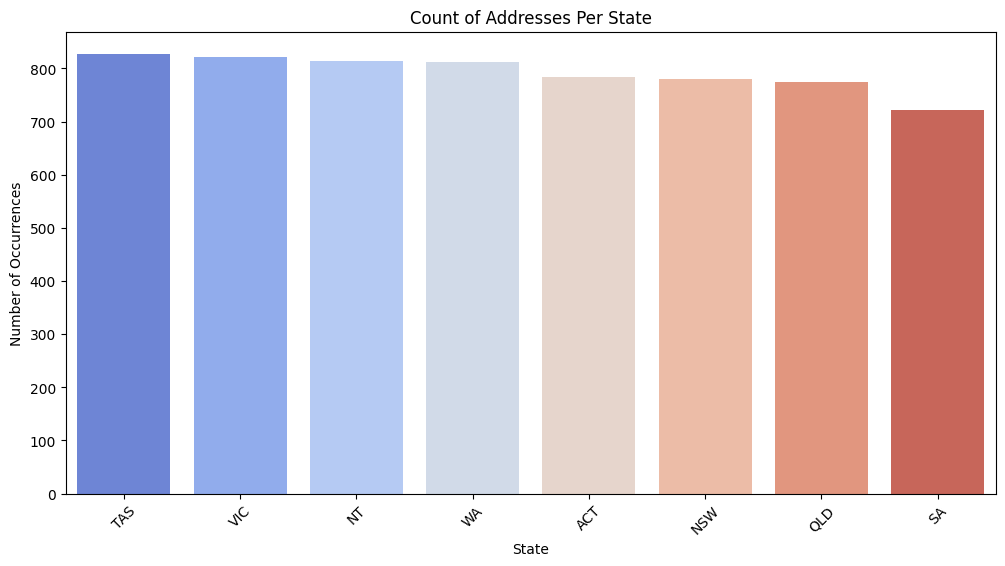

In [76]:


# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='state', y='count', data=state_counts, palette='coolwarm')

plt.xlabel("State")
plt.ylabel("Number of Occurrences")
plt.title("Count of Addresses Per State")
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()


In [77]:
df_eng.head()

,customer_id,street,type,suburb,postcode,full_address,postcode_bin,state
0,d36b3782-86b2-4f7e-97f4-19751cf735b1,Chandler Gardens,Park,Smithchester,6683,"Suite 159 4 Chandler Gardens Park, Smithcheste...",6.0,ACT
1,c16a23a6-c001-4846-b16a-e681692d861b,Tara Alleyway,Avenue,Mayberg,2629,"Flat 31 247 Tara Alleyway Avenue, Mayberg QLD...",2.0,QLD
2,f044a91f-3eeb-4342-9c96-2be28927a8a9,Sullivan Reserve,Reach,Vegamouth,2790,"Level 5 591 Sullivan Reserve Reach, Vegamouth ...",2.0,QLD
3,36096d1a-4f30-4c1c-8453-3db3ea81692c,Daniel Parade,Break,East Matthewfurt,2839,"Unit 09 7 Daniel Parade Break, East Matthewfur...",2.0,NSW
4,7484593e-4ff2-44d6-9de6-7e3bd9fe8b19,Charles Driveway,River,New Shannon,2611,"720/460 Charles Driveway River, New Shannon W...",2.0,WA


In [78]:

feature_engineering_2_explanations = """
Customers from different states may exhibit distinct purchasing behaviors due to regional preferences, economic conditions, or demographics.
State-level analysis can assist in predicting demand trends based on location.
it will help compare customer behavior across states, identifying which markets are underperforming or growing faster.
Businesses can refine delivery routes and service coverage based on state-specific demand and infrastructure.

"""

In [79]:
# Do not modify this code
print_tile(size="h3", key='feature_engineering_2_explanations', value=feature_engineering_2_explanations)

### D.4 New Feature "neighbor hood density>"

> Areas with high neighborhood density may have higher customer interactions and competitive activity.
> Helps businesses adjust pricing models based on neighborhood economic trends.



In [80]:
df_eng.head()

,customer_id,street,type,suburb,postcode,full_address,postcode_bin,state
0,d36b3782-86b2-4f7e-97f4-19751cf735b1,Chandler Gardens,Park,Smithchester,6683,"Suite 159 4 Chandler Gardens Park, Smithcheste...",6.0,ACT
1,c16a23a6-c001-4846-b16a-e681692d861b,Tara Alleyway,Avenue,Mayberg,2629,"Flat 31 247 Tara Alleyway Avenue, Mayberg QLD...",2.0,QLD
2,f044a91f-3eeb-4342-9c96-2be28927a8a9,Sullivan Reserve,Reach,Vegamouth,2790,"Level 5 591 Sullivan Reserve Reach, Vegamouth ...",2.0,QLD
3,36096d1a-4f30-4c1c-8453-3db3ea81692c,Daniel Parade,Break,East Matthewfurt,2839,"Unit 09 7 Daniel Parade Break, East Matthewfur...",2.0,NSW
4,7484593e-4ff2-44d6-9de6-7e3bd9fe8b19,Charles Driveway,River,New Shannon,2611,"720/460 Charles Driveway River, New Shannon W...",2.0,WA


Postcode and neighborhood density analysis

In [81]:


# Group by postcode to count customer density
df_eng['neighborhood_density'] = df_eng.groupby('postcode')['customer_id'].transform('count')

# Display the updated DataFrame with density feature
print(df_eng[['postcode', 'neighborhood_density']].head())


   postcode  neighborhood_density
0      6683                   1.0
1      2629                  17.0
2      2790                   4.0
3      2839                   3.0
4      2611                  23.0


In [82]:
# Identify the postcode with the highest neighborhood density
top_postcode = df_eng.loc[df_eng['neighborhood_density'].idxmax(), ['postcode', 'neighborhood_density']]

# Display the result
print(f"Postcode with the highest neighborhood density: {top_postcode['postcode']} (Density: {top_postcode['neighborhood_density']})")


Postcode with the highest neighborhood density: 2619 (Density: 194.0)


Lets seet it around different states

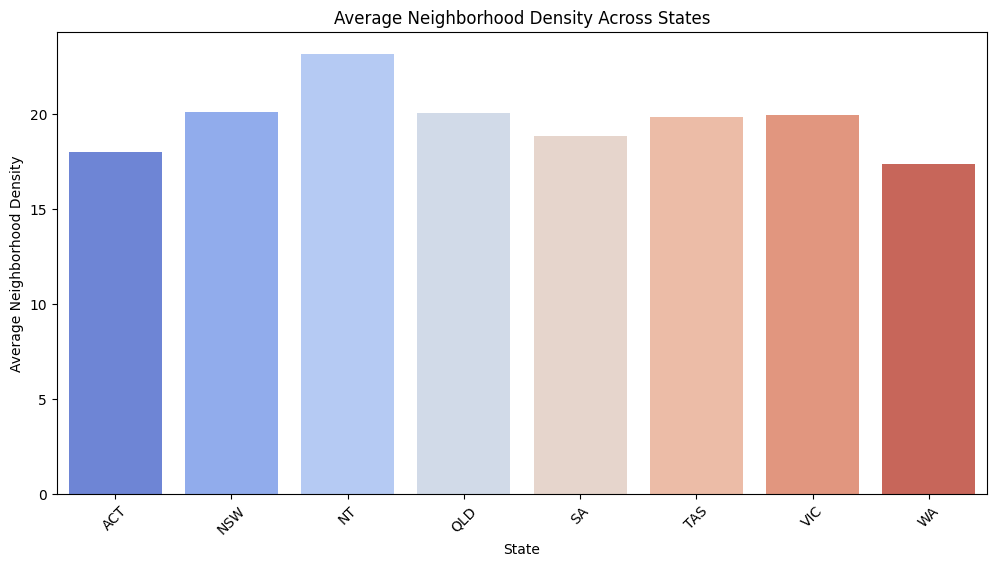

In [83]:


# Calculate average neighborhood density for each state
state_density_avg = df_eng.groupby('state')['neighborhood_density'].mean().reset_index()

# Rename columns for clarity
state_density_avg.columns = ['state', 'avg_neighborhood_density']

# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='state', y='avg_neighborhood_density', data=state_density_avg, palette='coolwarm')

plt.xlabel("State")
plt.ylabel("Average Neighborhood Density")
plt.title("Average Neighborhood Density Across States")
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()


In [84]:
df_eng.head()

,customer_id,street,type,suburb,postcode,full_address,postcode_bin,state,neighborhood_density
0,d36b3782-86b2-4f7e-97f4-19751cf735b1,Chandler Gardens,Park,Smithchester,6683,"Suite 159 4 Chandler Gardens Park, Smithcheste...",6.0,ACT,1.0
1,c16a23a6-c001-4846-b16a-e681692d861b,Tara Alleyway,Avenue,Mayberg,2629,"Flat 31 247 Tara Alleyway Avenue, Mayberg QLD...",2.0,QLD,17.0
2,f044a91f-3eeb-4342-9c96-2be28927a8a9,Sullivan Reserve,Reach,Vegamouth,2790,"Level 5 591 Sullivan Reserve Reach, Vegamouth ...",2.0,QLD,4.0
3,36096d1a-4f30-4c1c-8453-3db3ea81692c,Daniel Parade,Break,East Matthewfurt,2839,"Unit 09 7 Daniel Parade Break, East Matthewfur...",2.0,NSW,3.0
4,7484593e-4ff2-44d6-9de6-7e3bd9fe8b19,Charles Driveway,River,New Shannon,2611,"720/460 Charles Driveway River, New Shannon W...",2.0,WA,23.0


In [85]:

feature_engineering_3_explanations = """

#### Postcode with the Highest Density

Postcode 2619 stands out as the most densely populated area, with a neighborhood density of 194.

This suggests a high concentration of customers, making it a key location for potential targeted marketing and resource allocation.

#### State with the Highest Density

Among all states, Northern Territory (NT) records the highest neighborhood density.

This indicates NT might have more clustered customer activity, requiring strategic business planning for engagement and service optimization.

"""

In [86]:
# Do not modify this code
print_tile(size="h3", key='feature_engineering_3_explanations', value=feature_engineering_3_explanations)

---
## E. Save Datasets

In [87]:
try:
  df_eng.to_csv('../data/processed/df_eng_customer_address.csv', index=False)

except Exception as e:
  print(e)